In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore")

In [14]:
dist = pd.read_excel("piksel_matris8.xlsx")
df=dist.copy()
df=df.iloc[:,1:len(df)]
y=df["Sonuç"]
x=df.drop("Sonuç",axis=1)
x_scaled=x/4343.5
x_train_scaled=x_scaled[0:352] #to be used in...
x_test_scaled=x_scaled[352:]
y_train=y[0:352] #to be used in...
y_test=y[352:]

In [15]:
#MLPRegressor?

In [16]:
mlp_model = MLPRegressor()
#mlp_model.fit(x_train_scaled,y_train)
#mlp_pred = mlp_model.predict(x_test_scaled)
#mape_deger=mean_absolute_percentage_error(y_test,mlp_pred)
#mape_deger*100

In [17]:
cart_params={"hidden_layer_sizes":[100,200],"solver":["adam","lbfgs"],"momentum":[0.6,0.9],"max_iter":[1000],"learning_rate_init":[0.1,0.5],"activation":["relu","tanh"],"random_state":[100,120]}
cart_cv_model=GridSearchCV(mlp_model,cart_params, cv=10)

In [18]:
cart_cv_model.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [100, 200],
                         'learning_rate_init': [0.1, 0.5], 'max_iter': [1000],
                         'momentum': [0.6, 0.9], 'random_state': [100, 120],
                         'solver': ['adam', 'lbfgs']})

In [19]:
cart_cv_model.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'learning_rate_init': 0.1,
 'max_iter': 1000,
 'momentum': 0.6,
 'random_state': 120,
 'solver': 'lbfgs'}

In [20]:
y_pred=cart_cv_model.predict(x_test_scaled)

In [21]:
mape_deger=mean_absolute_percentage_error(y_test,y_pred)

In [22]:
mape_deger*100

2.7021384497086345

In [23]:
plt.style.use("seaborn-bright")

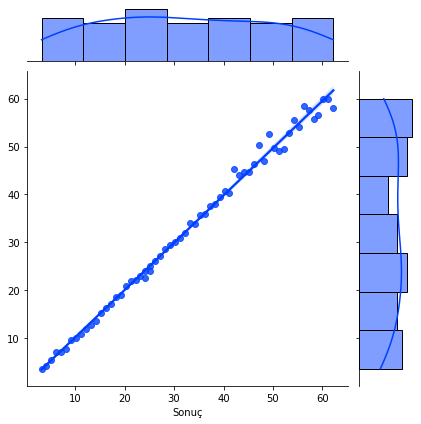

In [24]:
sns.jointplot(y_test, y_pred, kind="reg")
plt.show()